# Wali Ullah-ERP 09745

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment9\\New folder\\AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.isnull().sum()

#Passengers    0
dtype: int64

1) Create a SL problem (with appropriate shift of your choice) - Justify in text



In [6]:
df=data
dataframe=pd.DataFrame(df.values)
dataframe=pd.concat([df.shift(1),df],axis=1)
dataframe.columns=['t+1','t']


# split into train and test sets
X=dataframe.values
train_size=int(len(X)*(1-0.03472222222))
train, test=X[1:train_size], X[train_size:]
train_X, train_y=train[:,0],train[:,1]
test_X,test_y=test[:,0],test[:,1]

predictions=[x for x in test_X]
rmse=np.sqrt(mean_squared_error(test_y,predictions))


print('Test RMSE for t using t-1: %.3f' %rmse)




df=data
dataframe=pd.DataFrame(df.values)
dataframe=pd.concat([df.shift(2),df],axis=1)
dataframe.columns=['t+2','t']


# split into train and test sets
X=dataframe.values
train_size=int(len(X)*(1-0.03472222222))
train, test=X[1:train_size], X[train_size:]
train_X, train_y=train[:,0],train[:,1]
test_X,test_y=test[:,0],test[:,1]

predictions=[x for x in test_X]
rmse=np.sqrt(mean_squared_error(test_y,predictions))
print('Test RMSE for t using t-2: %.3f' %rmse)


Test RMSE for t using t-1: 61.439
Test RMSE for t using t-2: 103.756


Here I am using the airline passegers datset. It is the time series monthly data starts from 01/1949 to 12/1960 which has 144 rows. The objective is to choose the best forecasting time series model to forecast the last five months of the dataset. The training (insample) period is from 01/1949 to 07/1960 and the test (out-of-sample) period is from 08/1960 to 12/1960.
The data has trend and periodical additive seasonality. From above data the pure random walk (means using t-1 as a forcast for t) seems more reasonable than t-2 for t. Therefore, one period backshifting is reasonable to be considered as a basline model.

2) Fill out any missing values (if any) - remember the method for filling in missing values is different for TSF data

<AxesSubplot:xlabel='Month'>

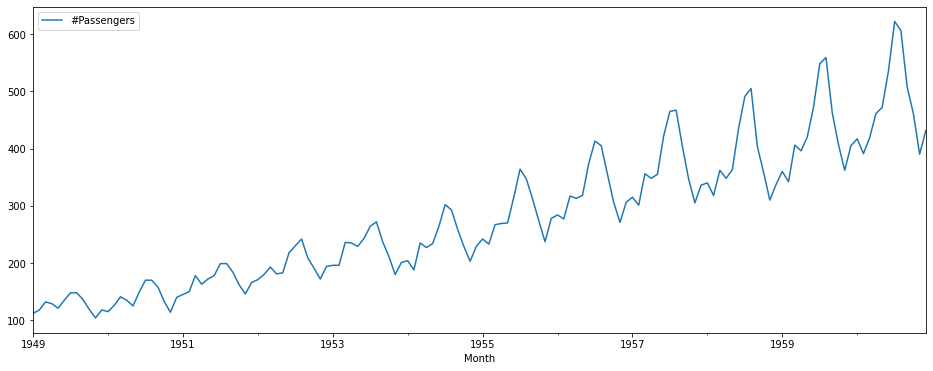

In [7]:
#linear interpolation
def fill_na_interpolate_forward(df, cols_to_interpolate):
    for i in cols_to_interpolate:
            df[i] = df[i].interpolate(method ='linear', limit_direction ='forward')
    return df

df=fill_na_interpolate_forward(data, ['#Passengers'])
df.plot(figsize = (16,6))


3) plot the time series and make any observations regarding cyclic trends, white noise, and random walk (if the series is not white noise or random walk, explain why it is not)

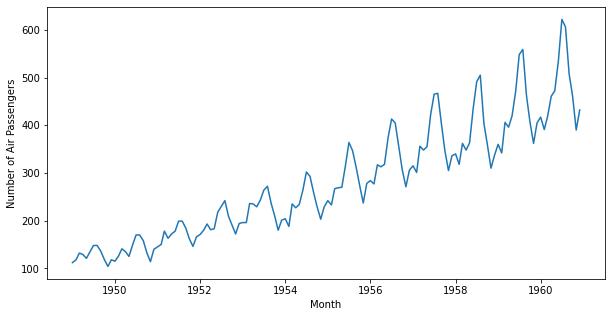

In [8]:
plt.figure(figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

The data plot shows that it has a linear trend, seasonality, and also follows a random walk as the data seems highly persistent. The series is not white noise as mean and variance seems time varying and the auto-covariance is not zero because of having a random walk like behaviour.

4) Seasonally decompose and interpret thorougly with respect to seasonality, trend, and residuals

<ipython-input-9-707b3bba690b>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result1 = seasonal_decompose(df['#Passengers'], model='additive', freq=12)


Additive Seasonality


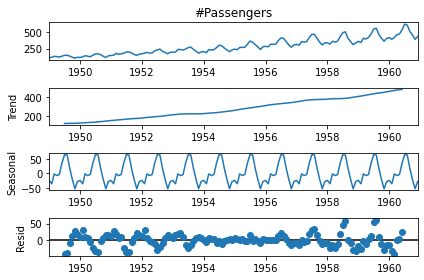

<ipython-input-9-707b3bba690b>:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result2 = seasonal_decompose(df['#Passengers'], model='multiplicative', freq=12)


Multiplicative Seasonality


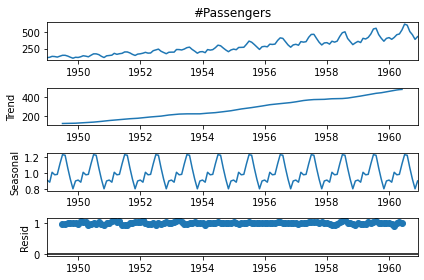

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(df['#Passengers'], model='additive', freq=12)
trend=result1.trend
seasonal=result1.seasonal
residual=result1.resid
print ('Additive Seasonality')
result1.plot()
plt.show()

result2 = seasonal_decompose(df['#Passengers'], model='multiplicative', freq=12)
print ('Multiplicative Seasonality')
result2.plot()
plt.show()

The seasonal decomposition shows that
    1. the data has a linear upward trend
    2. Additive seasonal pattern (not multiplicative because in modeling the multiplicative seasonality the residuals are not white noise- close to 1 which has mean greater than zero)
    3. the residuals seems white noise in the case of additive seasonality.

5) Is there a need to apply differencing on the series? Why or why not?Ã‚Â 

The series is not stationary and needs to be transformed to become stationary. However, we have to detrend it first and then check by ADF to check stationarity. If it becomes stationary then there is no need to be differened, otherwise a differenced transformed will be applied to make the stationary.

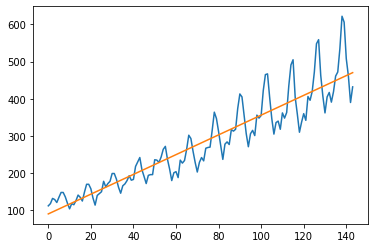

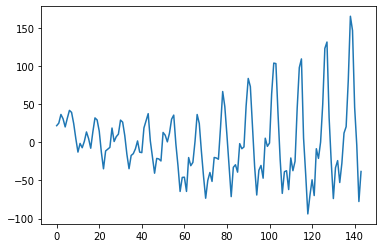

ADF Statistic: -2.101966
p-value : 0.243725
 Citical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [10]:
#detrending
from sklearn.linear_model import LinearRegression
X = [i for i in range(0, len(df))]
X = np.reshape(X, (len(X), 1))
y = df.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df))]
# plot detrended
plt.plot(detrended)
plt.show()

result=adfuller(detrended)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

The above results shows that the de-trended series is not stationary at level. So it need to be differened to get a stationary series.

6) If yes in 5), then apply differencing - did you apply order 1 or order 2? Why or why not? Interpret the results and prove stationarity through Dickey-Fuller


The series seems to be stationary after first difference. There is no need to be differenced of order 2. 

==+==+==+==+==+==+==+==+==+==+==+==+==+==+==
Results of First Difference Transformation
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==


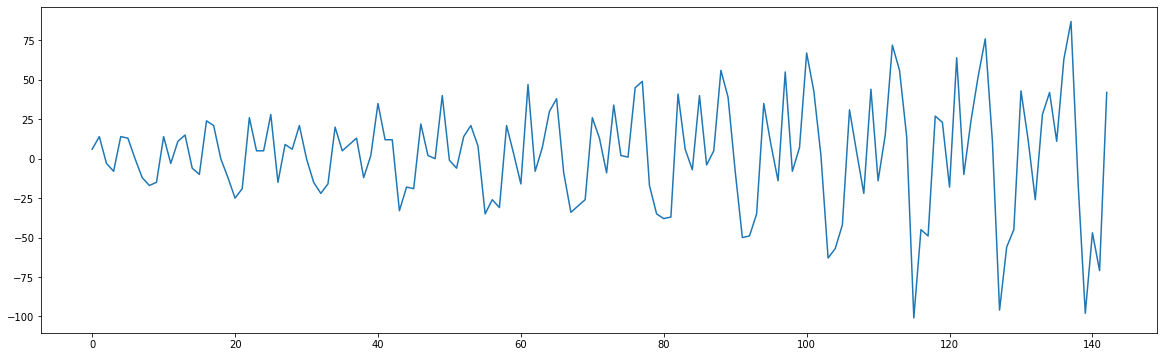

ADF Statistic: -2.829267
p-value : 0.054213
 Citical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==
Results of Second Difference Transformation
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==


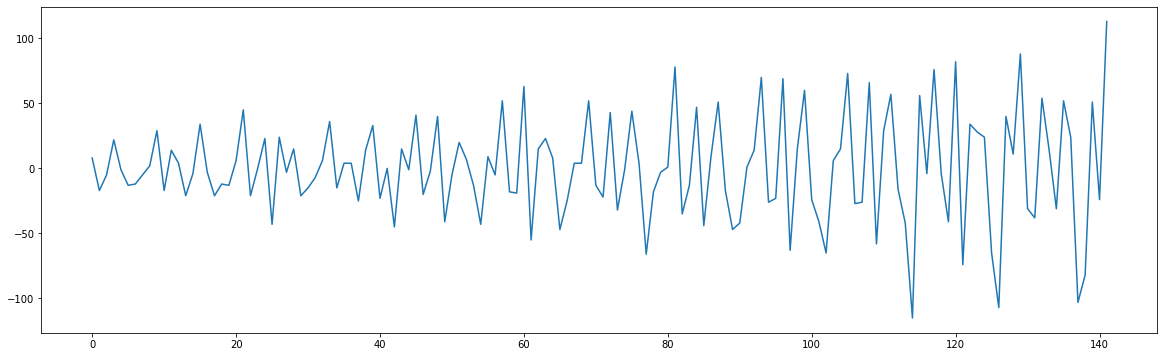

ADF Statistic: -16.384232
p-value : 0.000000
 Citical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [11]:
X=df.values

diff1=list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff1.append(value)
print('==+==+==+==+==+==+==+==+==+==+==+==+==+==+==')
print('Results of First Difference Transformation')
print('==+==+==+==+==+==+==+==+==+==+==+==+==+==+==')
plt.figure(figsize=(20,6))
plt.plot(diff1)
plt.show()

result=adfuller(diff1)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    
diff2=list()
for i in range(1, len(diff1)):
    value = diff1[i] - diff1[i - 1]
    diff2.append(value)
print('==+==+==+==+==+==+==+==+==+==+==+==+==+==+==')
print('Results of Second Difference Transformation')
print('==+==+==+==+==+==+==+==+==+==+==+==+==+==+==')
plt.figure(figsize=(20,6))
plt.plot(diff2)
plt.show()

result=adfuller(diff2)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

The first difference is stationary at about 5% significance level and there is no need to take the second difference because it will detoriate the data too much.

7) Generate forecasts with persistence model. Put comments in text for explanation.


The last five months forecasts with the persistent model (Random Walk) are as follows.

Test RMSE: 61.439
Actual: [606. 508. 461. 390. 432.]
Predictions: [622.0, 606.0, 508.0, 461.0, 390.0]
Forecasts Errors:       0
0 -16.0
1 -98.0
2 -47.0
3 -71.0
4  42.0
plotting with Presistent model


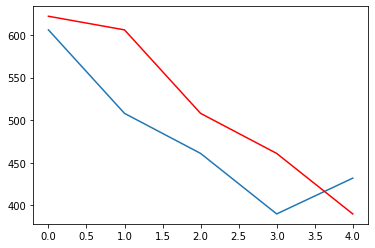

In [13]:
def persistence(x):
    return x

dataframe=pd.DataFrame(df.values)
dataframe=pd.concat([df.shift(1),df],axis=1)
dataframe.columns=['t+1','t']

# split into train and test sets
X=dataframe.values
train_size=int(len(X)*(1-0.03472222222))
train, test=X[1:train_size], X[train_size:]
train_X, train_y=train[:,0],train[:,1]
test_X,test_y=test[:,0],test[:,1]

predictions=[x for x in test_X]
rmse=np.sqrt(mean_squared_error(test_y,predictions))
print('Test RMSE: %.3f' %rmse)
residuals=[test_y[i]-predictions[i]for i in range(len(predictions))]
residuals=pd.DataFrame(residuals)
print('Actual:', test_y)
print('Predictions:', predictions)
print('Forecasts Errors:', residuals)

plt.plot(test_y)
plt.plot(predictions, color='red')
#plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting with Presistent model')

The forecast results with persistent model show that
    1. the errors are large and hence the RMSE is also large
    2. the forecasts do not seem reasonable.

8) Apply AR model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation. Interpret thoroughlyÃ‚Â  the model outputs.


Lag=13, Coef=[ 5.0294173  -0.41257128 -0.22353241 -0.11177354 -0.20531488 -0.04668528
 -0.2245393  -0.11302917 -0.25869134 -0.06304678 -0.25678852 -0.04103711
  0.78975369  0.45287672]
predicted error=1.513942, expected error=-16.000000
predicted error=-85.222539, expected error=-98.000000
predicted error=-77.658414, expected error=-47.000000
predicted error=-51.256116, expected error=-71.000000
predicted error=46.749597, expected error=42.000000
Test RMSE: 19.091


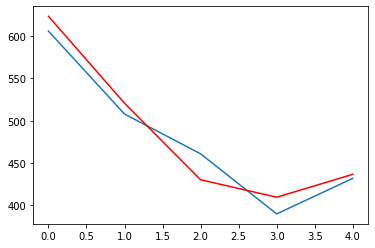

In [15]:
from statsmodels.tsa.ar_model import AR
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))
AR_pred = model_fit.predict()
arres=[train_resid[i]-AR_pred[i] for i in range(len(AR_pred))]
#train_resid-AR_pred
AR_resid=[train_y[i]-train_pred[i]-AR_pred[i] for i in range(len(AR_pred))]
#print(sales_pred)
# last 5 period forecasts
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    
    print('predicted error=%f, expected error=%f' % (pred_error, error))
rmse = np.sqrt(mean_squared_error(test_y, predictions))
prediction1=predictions
print('Test RMSE: %.3f' % rmse)
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

The AR(13) has been selected to forecast the last five months of the data set. The AR model is applied to the residual of Random Walk persistent model. The results shows that the forecasts errors RMSE falls to 19.091 from 61.439. Hence with the application of AR model the forcasts imptoves.

Persistent baseline model has the Test RMSE: 61.439
The AR model has the Test RMSE: 19.091

9) Apply MA model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation.Ã‚Â Interpret thoroughlyÃ‚Â the model outputs.

Lag=1, Coef=[-1.14090672 -0.16475693]
predicted error=3.923267, expected error=-17.513942
predicted error=1.744637, expected error=-12.777461
predicted error=0.964268, expected error=30.658414
predicted error=-6.192093, expected error=-19.743884
predicted error=2.112035, expected error=-4.749597
Test RMSE: 18.883


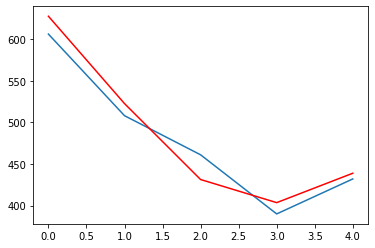

In [16]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
# model the training set residuals
model = AutoReg(arres, lags=1)
#model = AR(arres)
model_fit = model.fit()
window =1# model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

#Forecasts


history = AR_resid[len(AR_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence+AR
    yhat = prediction1[t]
    error = test_y[t]-yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

The MA(1) has been selected to forecast the last five months of the data set. The MA model is applied to the residual of AR(13) model. The results shows that the forecasts errors RMSE falls to 18.883 from 19.091. Hence with the application of AR model the forcasts imptoves a little bit.


Persistent baseline model has the Test RMSE: 61.439
The AR model has the Test RMSE: 19.091
The MA model has the Test RMSE: 18.883

10) Apply ARIMA model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation.Ã‚Â Interpret thoroughly the model outputs.


C:\Users\waliullah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\waliullah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Tue, 04 May 2021   AIC                           1361.696
Time:                        02:14:59   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6696      0.132     20.187      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passeng

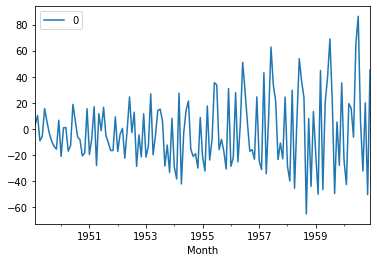

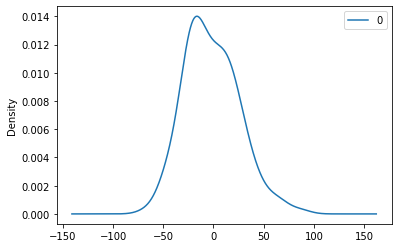

                0
count  143.000000
mean    -1.874527
std     27.089818
min    -65.205746
25%    -21.501166
50%     -5.082023
75%     15.729759
max     86.372225


In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order=(2,1,1))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [18]:
X = df.values
size = int(len(X) *(1-0.03472222222))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

Test RMSE: 36.414


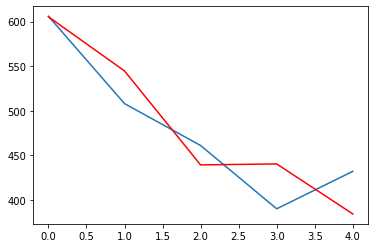

In [19]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

The ARIMA(2,1,1) has been selected to forecast the last five months of the data set. The ARIMA (2,1,1) model is applied to the orignal airline data set. The ARIMA (2,1,1) has the Test RMSE: 36.414.

11) How do ARIMA, MA and AR compare with baseline? How do they compare with each other? Which approach is the best?


The last five months forcasts RMSEs of all four models are given as:
Persistent baseline model has the Test RMSE: 61.439
The AR model has the Test RMSE: 19.091
The MA model has the Test RMSE: 18.883
The ARIMA (2,1,1) has the Test RMSE: 36.414
The results show that:
The ARIMA model performs better than the base line persistent model. However, its forecasts are errors are larger than the AR and MA models. The AR model seems better than the baseline and ARIMA model, whereas it has a bit larger forecasts errors than the MA model. The MA model unversally outperforms the remaing three forecasts in terms of RMSE.

In [22]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * (1-0.03472222222))
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse    

In [23]:
evaluate_arima_model(df.values, (2,1,1))

36.41354128985717

In [25]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [26]:
p_values = [0, 1, 2, 4]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=216.528
ARIMA(0, 0, 1) RMSE=119.101
ARIMA(0, 1, 0) RMSE=63.539
ARIMA(0, 1, 1) RMSE=61.074
ARIMA(1, 0, 0) RMSE=57.863
ARIMA(1, 0, 1) RMSE=55.567
ARIMA(1, 1, 0) RMSE=61.959
ARIMA(1, 1, 1) RMSE=61.454
ARIMA(2, 0, 0) RMSE=55.768
ARIMA(2, 0, 1) RMSE=61.261
ARIMA(2, 1, 0) RMSE=59.391
ARIMA(2, 1, 1) RMSE=36.414
ARIMA(4, 0, 0) RMSE=51.970
ARIMA(4, 0, 1) RMSE=55.591
ARIMA(4, 1, 0) RMSE=49.201
ARIMA(4, 1, 1) RMSE=39.607
Best ARIMA(2, 1, 1) RMSE=36.414
